In [18]:

import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


In [19]:
# Mapping Quidditch Teams to Stock Symbols
teams = {
    "Gryffindor": "TSLA",
    "Slytherin": "AAPL",
    "Ravenclaw": "MSFT",
    "Hufflepuff": "AMZN"
}

In [20]:
# User Input
team_name = input("Enter Quidditch Team (Gryffindor/Slytherin/Ravenclaw/Hufflepuff): ")
stock_symbol = teams.get(team_name, "TSLA")  # Default to TSLA if invalid 

In [21]:
# Fetch Stock Data
stock = yf.Ticker(stock_symbol)


In [22]:
# Display Available Expiration Dates
expirations = stock.options
print("\nAvailable Expiration Dates:", expirations)


Available Expiration Dates: ('2025-04-04', '2025-04-11', '2025-04-17', '2025-04-25', '2025-05-02', '2025-05-16', '2025-06-20', '2025-07-18', '2025-08-15', '2025-09-19', '2025-10-17', '2025-12-19', '2026-01-16', '2026-03-20', '2026-06-18', '2026-12-18', '2027-01-15', '2027-06-17', '2027-12-17')


In [9]:

# User selects expiration date
exp_date = input("Enter Expiration Date (from the list above): ")

In [10]:
# Fetch Option Chain Data
option_chain = stock.option_chain(exp_date)
calls = option_chain.calls
puts = option_chain.puts

In [11]:

# Convert 'impliedVolatility' column to numeric (handle missing values)
calls["impliedVolatility"] = calls["impliedVolatility"].fillna(0).astype(float)
puts["impliedVolatility"] = puts["impliedVolatility"].fillna(0).astype(float)

In [12]:
# Select Features & Target for ML Model (Predicting Call Prices)
X_calls = calls[['strike', 'impliedVolatility']]
y_calls = calls['lastPrice']

X_puts = puts[['strike', 'impliedVolatility']]
y_puts = puts['lastPrice']


In [13]:
# Train ML Model for Calls
X_train, X_test, y_train, y_test = train_test_split(X_calls, y_calls, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

call_model = LinearRegression()
call_model.fit(X_train_scaled, y_train)
call_predictions = call_model.predict(scaler.transform(X_calls))

In [14]:
# Train ML Model for Puts
X_train, X_test, y_train, y_test = train_test_split(X_puts, y_puts, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

put_model = LinearRegression()
put_model.fit(X_train_scaled, y_train)
put_predictions = put_model.predict(scaler.transform(X_puts))

In [15]:
# Add Predictions to DataFrame
calls['PredictedPrice'] = call_predictions
puts['PredictedPrice'] = put_predictions

c:\Users\Satyajit\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128737 (\N{SHIELD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


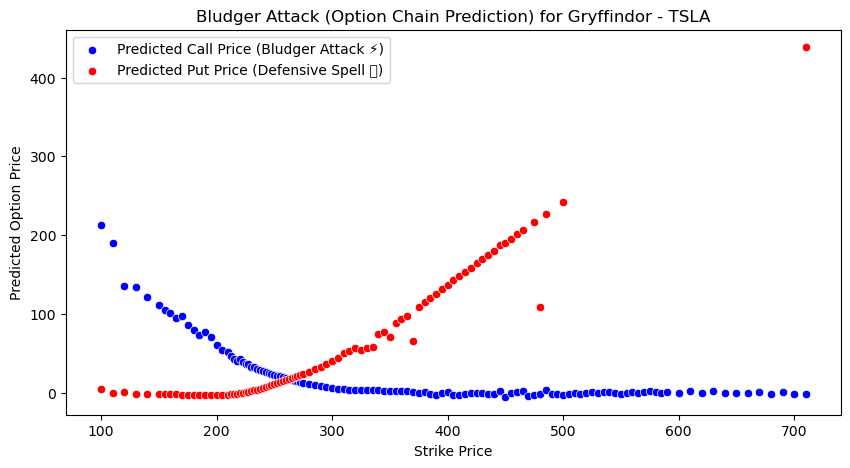

In [16]:
# Visualization: Bludger Attack (Option Chain Prediction)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=calls["strike"], y=calls["PredictedPrice"], color="blue", label="Predicted Call Price (Bludger Attack ⚡)")
sns.scatterplot(x=puts["strike"], y=puts["PredictedPrice"], color="red", label="Predicted Put Price (Defensive Spell 🛡️)")
plt.xlabel("Strike Price")
plt.ylabel("Predicted Option Price")
plt.title(f"Bludger Attack (Option Chain Prediction) for {team_name} - {stock_symbol}")
plt.legend()
plt.show()

In [23]:
from sklearn.metrics import r2_score, mean_absolute_error

# Evaluate Call Model
call_r2 = r2_score(y_calls, call_predictions)
call_mae = mean_absolute_error(y_calls, call_predictions)

# Evaluate Put Model
put_r2 = r2_score(y_puts, put_predictions)
put_mae = mean_absolute_error(y_puts, put_predictions)

# Display the results
print(f"Call Option Model Accuracy:")
print(f"R² Score: {call_r2:.4f}")
print(f"Mean Absolute Error: {call_mae:.4f}\n")

print(f"Put Option Model Accuracy:")
print(f"R² Score: {put_r2:.4f}")
print(f"Mean Absolute Error: {put_mae:.4f}")


Call Option Model Accuracy:
R² Score: 0.9765
Mean Absolute Error: 3.1614

Put Option Model Accuracy:
R² Score: 0.9705
Mean Absolute Error: 8.6465


In [17]:
#  Trade Strategy Suggestion
iv_threshold = calls["impliedVolatility"].mean()
if iv_threshold < 0.3:
    strategy = "Safe Trade (Defensive Strategy)"
elif iv_threshold < 0.6:
    strategy = "Balanced Trade (Moderate Risk)"
else:
    strategy = "High-Risk Trade (Aggressive Strategy)"

print(f"\n Suggested Trading Strategy: {strategy}")


 Suggested Trading Strategy: High-Risk Trade (Aggressive Strategy)
